In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from IPython.core.display import HTML
from ipywidgets import interactive

In [2]:
L=300
Gamma=0.5
Lambda=0.5
a_0=Lambda
a_1=0.5*(1-Gamma)
a_2=0.5*(1+Gamma)

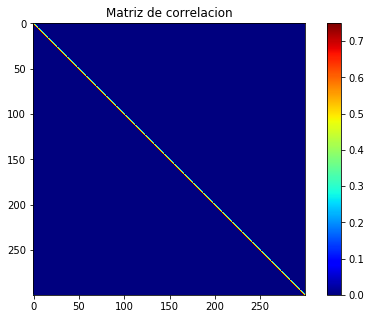

In [3]:
A=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            A[i,j] = a_0
        elif (i-j) % L == 1:
            A[i,j] = a_2
        elif (j-i) % L == 1:
            A[i,j] = a_1
plt.figure(figsize=(8,5))
plt.imshow(A,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz de correlacion")
plt.show()

In [4]:
def alpha(Gamma,Lambda,theta):
    a_0=Lambda
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return a_0+(a_2+a_1)*np.cos(theta)
def beta(Gamma,Lambda,theta):
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return (a_1-a_2)*np.sin(theta)
def omega(Gamma,Lambda,theta):
    return np.sqrt(alpha(Gamma,Lambda,theta)**2 + beta(Gamma,Lambda,theta)**2)

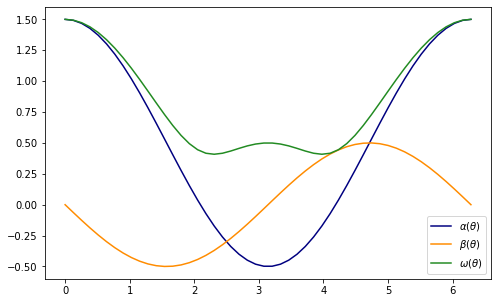

In [5]:
plt.figure(figsize=(8,5))
x=np.linspace(0,2*np.pi)
plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
plt.legend()
plt.savefig("Energias.pdf")
plt.show()

In [6]:
def Energias(Gamma,Lambda):
    plt.figure(figsize=(8,5))
    x=np.linspace(0,2*np.pi)
    plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
    plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
    plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()

interactive_plot = interactive(Energias, Gamma=(-5.0, 5.0), Lambda=(-5.0, 5.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='Gamma', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

In [7]:
def sub_B(Gamma,Lambda,L,theta):
    b=np.array([[alpha(Gamma,Lambda,2.0*np.pi*theta/L)
                 ,-beta(Gamma,Lambda,2.0*np.pi*theta/L)],
                [beta(Gamma,Lambda,2.0*np.pi*theta/L),
                alpha(Gamma,Lambda,2.0*np.pi*theta/L)]])
    return b

In [8]:
B=np.zeros((L,L))
B[0,0]=alpha(Gamma,Lambda,0)/omega(Gamma,Lambda,0)
B[L-1,L-1]=alpha(Gamma,Lambda,np.pi)/omega(Gamma,Lambda,np.pi)

In [9]:
for i in range(1,L//2):
    B[2*i-1:1+2*i,2*i-1:1+2*i]=sub_B(Gamma,Lambda,L,i)/omega(Gamma,Lambda,2.0*np.pi*i/L)

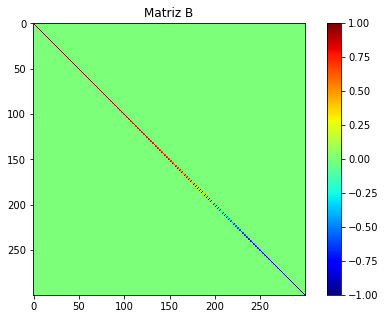

In [10]:
plt.figure(figsize=(8,5))
plt.imshow(B,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz B")
plt.show()

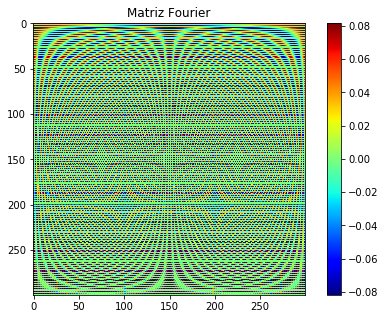

In [11]:
Matrix_Fourier=np.zeros((L,L))
for i in range(0,L,2):
    for j in range(L):
        if i >0:
            Matrix_Fourier[i,j]=np.sqrt(2.0/L)*np.cos(np.pi*i*j/L)
        else:
            Matrix_Fourier[i,j]=np.sqrt(1.0/L)*np.cos(np.pi*i*j/L)
plt.figure(figsize=(8,5))
plt.imshow(Matrix_Fourier,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz Fourier")
plt.show()
for i in range(0,L,2):
    for j in range(L):
        if i < L-2:
            Matrix_Fourier[i+1,j]=np.sqrt(2.0/L)*np.sin(2.0*np.pi*(i/2.0+1.0)*j/L)
        else:
            Matrix_Fourier[L-1,j]=np.sqrt(1.0/L)*np.cos(np.pi*j)

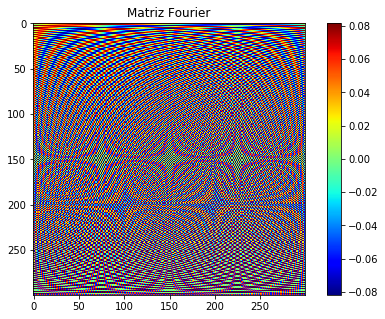

In [12]:
plt.figure(figsize=(8,5))
plt.imshow(Matrix_Fourier,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz Fourier")
plt.show()

In [13]:
O_1=np.matmul(B.T,Matrix_Fourier)
O_2=Matrix_Fourier.T

In [14]:
diag=O_1@A@O_2

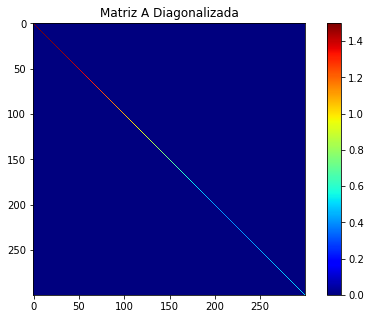

In [15]:
plt.figure(figsize=(8,5))
plt.imshow(diag,cmap=plt.cm.jet)
plt.colorbar()
plt.title("Matriz A Diagonalizada")
plt.show()

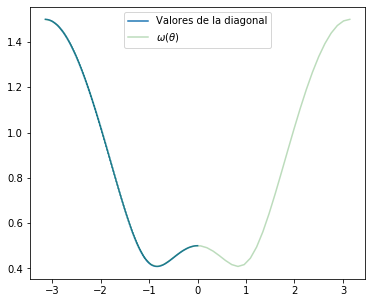

In [16]:
plt.figure(figsize=(6,5))
plt.plot(np.linspace(0,np.pi,len(np.diagonal(diag)))-np.pi,np.diagonal(diag),label="Valores de la diagonal")
plt.plot(x-np.pi,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen",alpha=0.3)
plt.legend()
plt.show()

In [22]:
M_esp=O_1.T@np.diag([-0.5]*L)@O_2.T

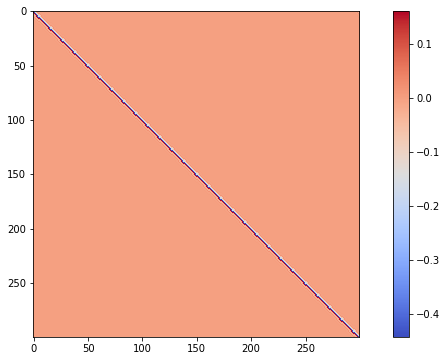

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(M_esp,cmap="coolwarm")
plt.colorbar()
plt.show()


In [24]:
S=np.linalg.svd(M_esp,compute_uv=False)

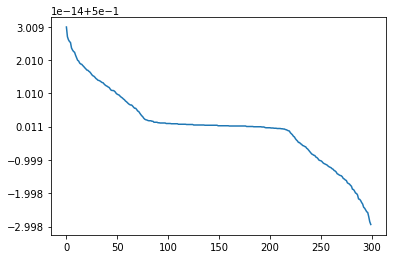

In [25]:
plt.plot(S)

In [26]:
S

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.